Chris S. Castañeda-Barajas

Data Science 450: Deriving Knowledge from Data at Scale

August 7, 2016

# Assignment 4: Data Prep

In [469]:
## Setup enviroment
# library(tsne)
library(data.table)
library(gplots)
library(RColorBrewer)

setwd("~/Dropbox/UW_DATA_SCIENCE/class-3/assignment_4")
list.files()

[1] "Assignment 4 - Data Exploration.pdf" "Assignment_4_Data_Prep.ipynb"       
[3] "assignment4scratch.R"                "Basic Correlation Analysis.pdf"     
[5] "scratch.ipynb"                       "Video_Store.csv"

In [6]:
## Load Data
d = read.csv("Video_Store.csv", stringsAsFactors = T)

In [9]:
as.data.frame(names(d))

,names(d)
1,Cust.ID
2,Gender
3,Income
4,Age
5,Rentals
6,Avg.Per.Visit
7,Incidentals
8,Genre


### a) Use smoothing by bin means to smooth the values of the Age attribute. Use a bin depth of 4.

In [346]:
BinMeansSmoothing <- function (d, binDepth) {
  # ---------------------------------------------------------------------------
  # Arguments:
  #   d: vector of numeric data to be binned
  #   binDepth: integer value of desired bin depth
  # Returns:
  #   numeric vector original data smoothed by bin means of desired bin depth
  # ---------------------------------------------------------------------------
  binIndicies <- seq(from=1, to=length(d), by=binDepth)
  
  binnedData <- as.data.frame(sapply(binIndicies, function (binIndex) {
    sort(d)[binIndex:(binIndex+binDepth-1)]
  }))
  
  binSize <- rep(0,ncol(binnedData))
  
  smoothedData <- sapply(sort(d), function(datum) {
    for(bin in 1:ncol(binnedData)) {
      isInBin <- as.logical(
        length(intersect(datum, binnedData[,bin])) > 0 
        && 
        binSize[bin] < binDepth
      )
      if(isInBin) {
        binSize[bin] <<- binSize[bin]+1
        return (mean(binnedData[,bin], na.rm=T))
      }
    }
  })
  
  smoothedData <- smoothedData[rank(d)]

  return (smoothedData)
}

In [367]:
d$Age.Smooth <- BinMeansSmoothing(d$Age, binDepth=4)
data.frame(
  d$Age,
  d$Age.Smooth
  )

,d.Age,d.Age.Smooth
1,25,25
2,33,34
3,20,20.5
4,70,63
5,35,35
6,20,20.5
7,45,45
8,25,25
9,21,20.5
10,40,38


### b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0].

In [372]:
NormalizeMinMax <- function ( v ){
  return( (v - min(v)) / (max(v) - min(v)) )
}


In [373]:
d$Income.Norm <- NormalizeMinMax(d$Income)
data.frame(
  d$Income,
  d$Income.Norm
)

,d.Income,d.Income.Norm
1,45000,0.5
2,54000,0.6022727
3,32000,0.3522727
4,59000,0.6590909
5,37000,0.4090909
6,18000,0.1931818
7,29000,0.3181818
8,74000,0.8295455
9,38000,0.4204545
10,65000,0.7272727


### c) Use z-score normalization to standardize the values of the Rentals attribute.

In [374]:
NormalizeZScore <- function ( v ){
  return( (v - mean(v)) / sd(v) )
}

In [377]:
d$Rentals.Norm <- NormalizeZScore(d$Rentals)
data.frame(
  d$Rentals,
  d$Rentals.Norm
)


,d.Rentals,d.Rentals.Norm
1,27,0.07579055
2,12,-1.420076
3,42,1.571657
4,16,-1.021178
5,25,-0.1236583
6,33,0.674137
7,19,-0.7220047
8,31,0.4746882
9,18,-0.8217291
10,21,-0.5225559


### d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K

In [384]:
d$Income.Descretized[d$Income >= 60000] <- "High"
d$Income.Descretized[d$Income < 60000 && d$Income >=25000] <- "Mid"
d$Income.Descretized[d$Income < 25000] <- "Low"

In [386]:
data.frame(
  d$Income,
  d$Income.Descretized
)


,d.Income,d.Income.Descretized
1,45000,Mid
2,54000,Mid
3,32000,Mid
4,59000,Mid
5,37000,Mid
6,18000,Low
7,29000,Mid
8,74000,Mid
9,38000,Mid
10,65000,Mid


### e) Convert the original data (not the results of parts a-d) into the standard spreadsheet format (note that this requires that you create, for every categorical attribute, additional attributes corresponding to values of that categorical attribute; numerical attributes in the original data remain unchanged).

In [390]:
categrolicalAttributes <- c(2,7,8)
names(d[, categrolicalAttributes])

[1] "Gender"      "Incidentals" "Genre"

In [422]:
d$Male <- d$Gender=="M"
d$Female <- d$Gender=="F"

In [423]:
d$HasIncidentals <- d$Incidentals=="Yes"

In [424]:
d$Action <- d$Genre=="Action"
d$Drama <- d$Genre=="Drama"
d$Comedy <- d$Genre=="Comedy"

In [425]:
head(d)

,Cust.ID,Gender,Income,Age,Rentals,Avg.Per.Visit,Incidentals,Genre,Age.Smooth,Income.Norm,Rentals.Norm,Income.Descretized,Male,Female,HasIncidentals,Action,Drama,Comedy
1,1,M,45000,25,27,2.5,Yes,Action,25,0.5,0.07579055,Mid,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE
2,2,F,54000,33,12,3.4,No,Drama,34,0.6022727,-1.420076,Mid,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
3,3,F,32000,20,42,1.6,No,Comedy,20.5,0.3522727,1.571657,Mid,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
4,4,F,59000,70,16,4.2,Yes,Drama,63,0.6590909,-1.021178,Mid,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE
5,5,M,37000,35,25,3.2,Yes,Action,35,0.4090909,-0.1236583,Mid,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE
6,6,M,18000,20,33,1.7,No,Action,20.5,0.1931818,0.674137,Low,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE


### f) Using the standardized data set (from part e), perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You need to construct a complete Correlation Matrix (Please read the brief document Basic Correlation Analysis (see course website) for more detail). Can you observe any "significant" patterns among groups of two or more variables? Explain.

#### Answer:
According to my correlation analysis (see Correlation Heatmap below, figure F.1), a customer's Age seems to be highly correlated with a customer's Income, a customer's propensity to rent Drama movies, and the Average number of Rentals per Visit, i.e. the older a customer is the more likely they are to have a higher income, the more likely they are to rent rent dramas, and the more likely they are to rent multiple movies at a time (see figure F.2 below for relationship between Age and Rentals per Visit).  Similarly, the older a customer is, the more likely they are to be female, however the correlation isn't as strong as with the previously mentioned factors.

Additionally, there seems to be a strong correlation between Male customers renting Action movies and haveing Inicidentals.  

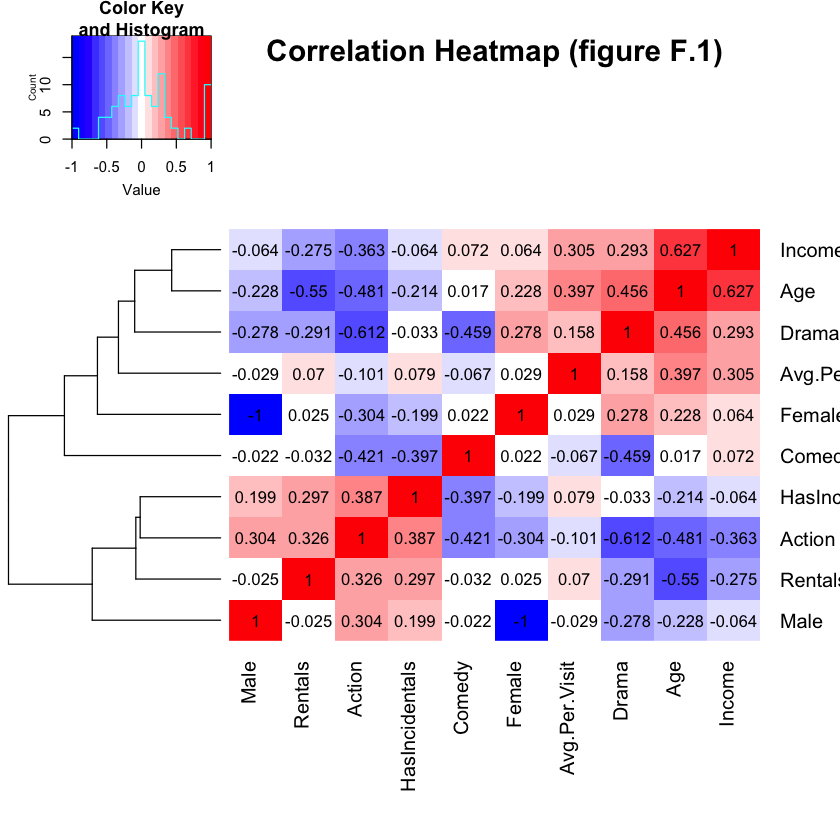

In [591]:
attributes_for_correlation_analysis <- c("Income", "Age", "Rentals", "Avg.Per.Visit", "Male", "Female", "HasIncidentals", "Action", "Drama", "Comedy")
d.correlated <- cor(d[,attributes_for_correlation_analysis])

heatmap.2(
  d.correlated, 
  main = "Correlation Heatmap (figure F.1)",
  cellnote = round(d.correlated, 3),
  notecol="black", 
  dendrogram = "row",
  margins = c(10,4),
  trace="none", 
  col = colorRampPalette(c("blue", "white", "red"))(21)  # blue: -1, white: 0, red: 1
)

In [533]:
mean(d$Age)
mean(d$Age[d$Female==TRUE])
mean(d$Age[d$Male==TRUE])

[1] 31.56

[1] 34.375

[1] 28.96154

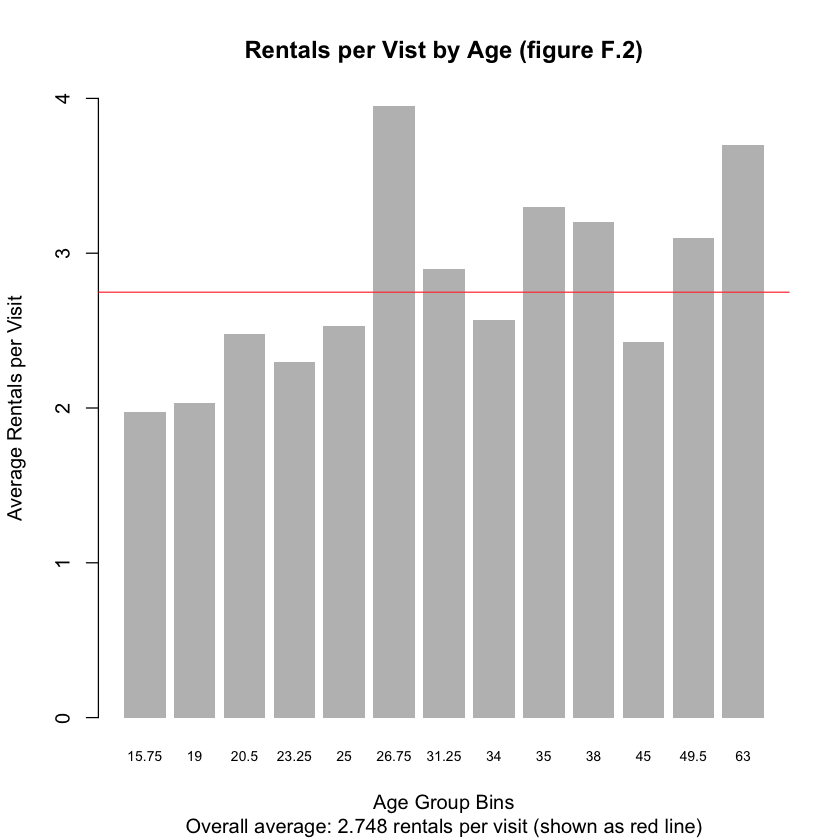

In [592]:
age_groups <- sort(unique(d$Age.Smooth))

avg_per_age <- sapply(age_groups, function(age_group) {
  mean(d$Avg.Per.Visit[d$Age.Smooth==age_group])
})

barplot(
  height=avg_per_age, 
  width=1, 
  names.arg=age_groups,
  ylim=c(0,4),
  border = 0,
  cex.names=.7,
  main = "Rentals per Vist by Age (figure F.2)",
  sub = paste("Overall average:", mean(d$Avg.Per.Visit), "rentals per visit (shown as red line)"),
  xlab = "Age Group Bins",
  ylab = "Average Rentals per Visit"
)
abline(h=mean(d$Avg.Per.Visit), col="#ff4444")

### g) Perform a cross-tabulation of the two "gender" variables versus the three "genre" variables. Show this as a 2 x 3 table with entries representing the total counts. 
### Then, use a graph or chart that provides the best visualization of the relationships between these sets of variables. Can you draw any significant conclusions?

#### Answer:
See Table G.1 and Figure G.1 below for analysis of relationship between gender and movie genre rentals.  According to my analysis men tend to rent action movies more frequently and women tend to rent dramas more frequently.  Men and women seem to rent comedies at a similar rate.


In [632]:
genres <- c("Action", "Drama", "Comedy")

GenderGenreTable <- t(data.frame(
  Males = sapply(genres, function(genre) sum(d$Male[d[,genre]==T])),
  Females = sapply(genres, function(genre) sum(d$Female[d[,genre]==T])),
  Male.Correlations = sapply(genres, function(genre) cor(d$Male, d[,genre])),
  Female.Correlations = sapply(genres, function(genre) cor(d$Female, d[,genre]))
))

print(paste("Table G.1"))
GenderGenreTable

[1] "Table G.1"


,Action,Drama,Comedy
Males,13,7,6
Females,5,13,6
Male.Correlations,0.30357629,-0.27783119,-0.02249606
Female.Correlations,-0.30357629,0.27783119,0.02249606


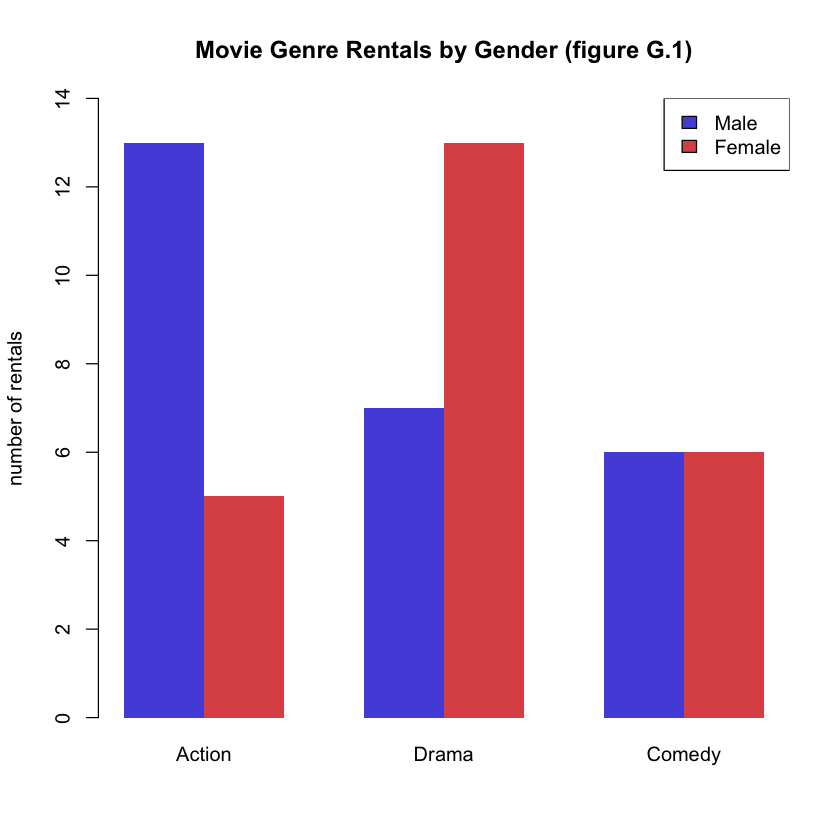

In [634]:
blue_and_red <- c("#5555dd", "#dd5555")

barplot(
  GenderGenreTable[1:2,],
  border=0,
  beside=T,
  col= blue_and_red,
  main = "Movie Genre Rentals by Gender (figure G.1)",
  ylab = "number of rentals",
  ylim = c(0,14)
)
legend(
  "topright",
  c("Male", "Female"),
  fill = blue_and_red
)

### h) Select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). Then, create a summary (e.g., using means, medians, and/or other statistics) of the selected data with respect to all other attributes. Can you observe any significant patterns that characterize this segment of customers? Explain.
### Note: To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.


#### Answer:
According to my analysis, "Good" customers tend to be younger, tend to have slightly lower incomes, and tend to favor action and comedy movies (see Figures H.1, H.2, and Table H.1 below).

In [649]:
d$GoodCustomer <- d$Rentals >= 30
sum(d$GoodCustomer)

[1] 18

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   22.00   30.00   31.56   37.50   70.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   20.00   23.50   25.17   28.75   47.00 

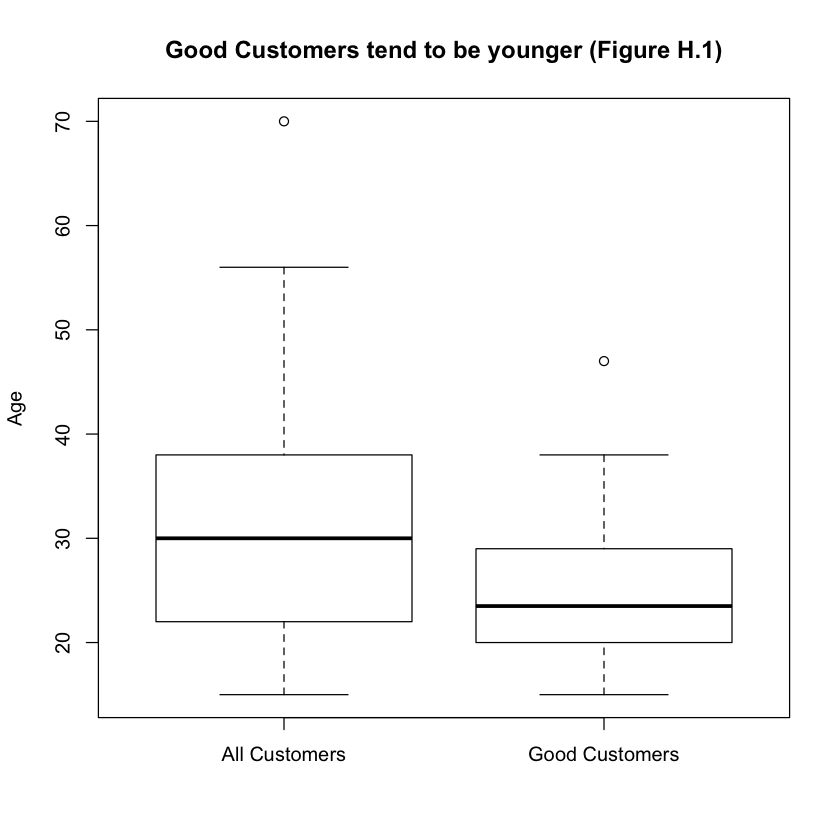

In [675]:
## Good Customers tend to be younger
summary(d$Age)
summary(d$Age[d$GoodCustomer])

boxplot(
  d$Age, 
  d$Age[d$GoodCustomer], 
  names=c("All Customers", "Good Customers"), 
  main = "Good Customers tend to be younger (Figure H.1)",
  ylab="Age")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000   26750   41000   42300   56750   89000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2000   19500   31500   37670   56000   74000 

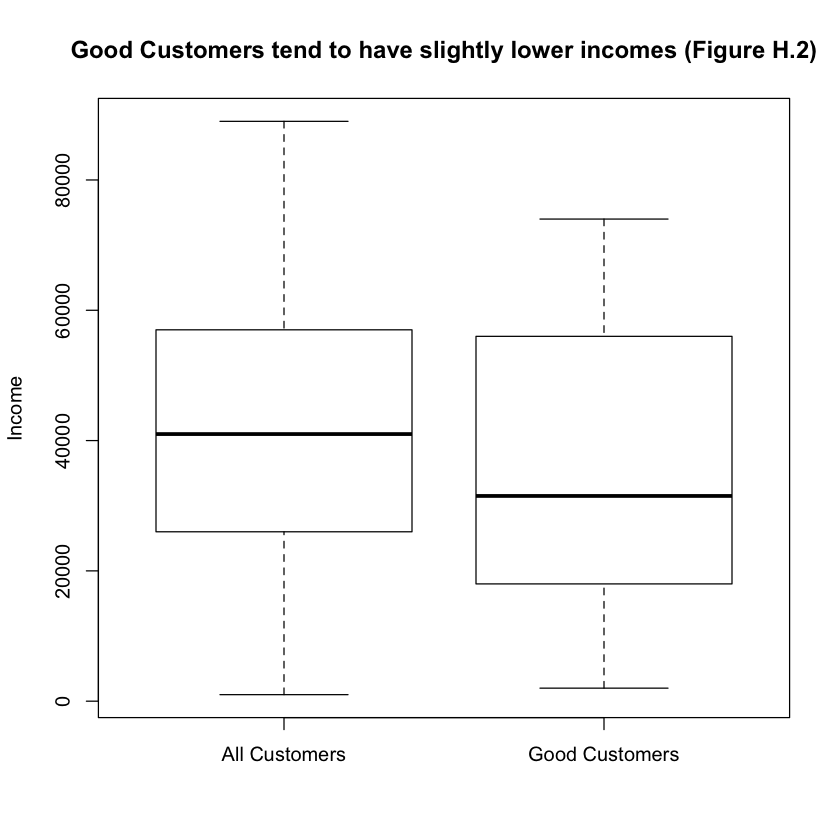

In [676]:
## Good Customers tend to have slightly lower incomes
summary(d$Income)
summary(d$Income[d$GoodCustomer])

boxplot(
  d$Income, 
  d$Income[d$GoodCustomer], 
  names=c("All Customers", "Good Customers"), 
  main = "Good Customers tend to have slightly lower incomes (Figure H.2)",
  ylab="Income")

In [677]:
## Good Customers tend to favor action and comedy movies
genres <- c("Action", "Drama", "Comedy")

GoodCustomerGenreTable <- t(data.frame(
  All.Customers = sapply(genres, function(genre) mean(d[,genre]==T)),
  Good.Customers = sapply(genres, function(genre) mean(d$GoodCustomer[d[,genre]==T]))
))

print(paste("Table H.1: Rental Rates by Genre"))
print(paste("Good Customers tend to favor action and comedy movies"))
GoodCustomerGenreTable

[1] "Table H.1: Rental Rates by Genre"
[1] "Good Customers tend to favor action and comedy movies"


,Action,Drama,Comedy
All.Customers,0.36,0.40,0.24
Good.Customers,0.5000000,0.2000000,0.4166667


### i) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished (e.g., should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.

#### Answer:
In order to increase the sales of incidentals, I would recomend targeting men who rent action movies and have a high number of rentals.  According to my correlation analysis above (see figure F.1) there appears to be a strong correlation between the sales of incidentals and total rentals, rentals of action movies and male customers.